In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [43]:
df = pd.read_excel("natural_gas.xlsx")

In [44]:
df.head()

,Consumption,Temperature
0,551547920.0,6.741935
1,551886440.0,5.857143
2,513182950.0,7.225806
3,281495382.0,12.566667
4,138625166.0,17.225806


In [45]:
consumption = df["Consumption"]

<Axes: >

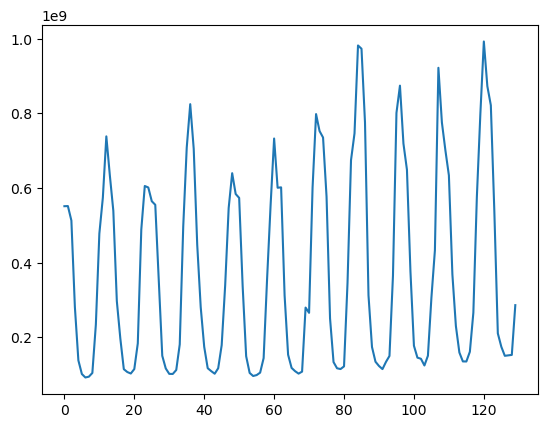

In [42]:
consumption.plot()

<Axes: >

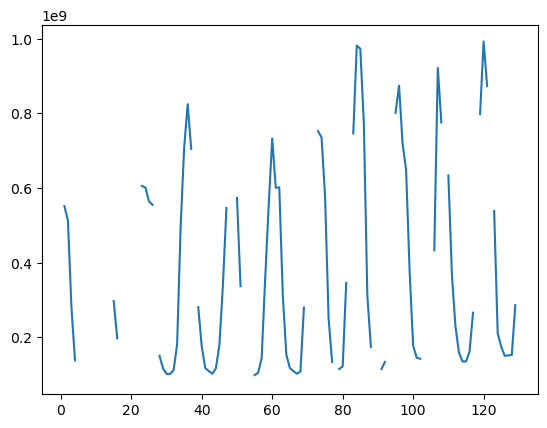

In [48]:
# Generating Na values

np.random.seed(0)
ix = np.random.choice([False, True], size=consumption.size, p=[0.9, 0.1])
consumption[ix] = np.nan
consumption.plot()

In [8]:
# generate missing values
! pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
    --------------------------------------- 10.2/625.1 kB ? eta -:--:--
    --------------------------------------- 10.2/625.1 kB ? eta -:--:--
   -- ------------------------------------ 41.0/625.1 kB 393.8 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/625.1 kB 804.6 kB/s eta 0:00:01
   --------- ---------------------------- 163.8/625.1 kB 898.2 kB/s eta 0:00:01
   --------------- ------------------------ 245.8/625.1 kB 1.0 MB/s eta 0:00:01
   --------------------- ------------------ 337.9/625.1 kB 1.2 MB/s eta 0:00:01
   ------------------------------ --------- 471.0/625.1 kB 1.6 MB/s eta 0:00:01
   ----------------------------------- ---- 553.0/625.1 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  624.6/625.1 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------  624.6/625.1 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------  624.6/625.1 kB 1.6 MB

<Axes: >

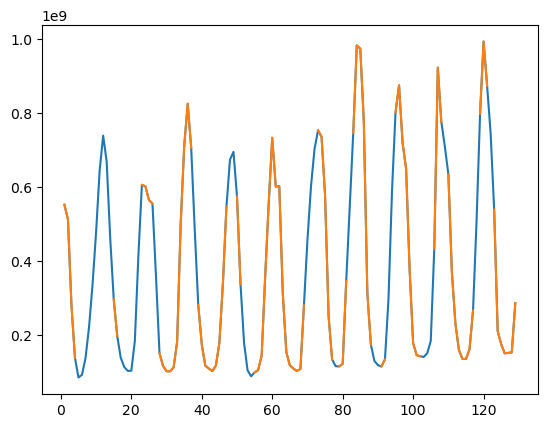

In [55]:
consumption_interpolated = consumption.interpolate("polynomial", order = 2)
consumption_interpolated.plot()
consumption.plot()

In [66]:
df.head()

,Consumption,Temperature
0,0.743564,-1.237245
1,0.744885,-1.359303
2,0.593894,-1.170495
3,-0.309972,-0.433719
4,-0.867340,0.209014


In [77]:
# Standardization process
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("natural_gas.xlsx")

scaler = StandardScaler()
scaler.fit(df.iloc[:-12, :])

df = scaler.transform(df)


#df = pd.read_excel("natural_gas.xlsx")
#mu = df.iloc[: -12, :].mean()
#sigma = df.iloc[: -12, :].std()
#df = (df - mu)/ sigma

In [88]:
def make_data(data: np.ndarray, lag: int = 12):
    """
    Splits time series data into lagged features (X) and targets (y).

    Args:
        data (np.ndarray): The time series data.
        lag (int): The lag interval, default is 12.

    Returns:
        Tuple[np.ndarray, np.ndarray]: 
            - X (np.ndarray): The array containing lagged features.
            - y (np.ndarray): The array containing target values to predict.
    """
    X = []
    y = []

    # Iterate over the data to create lagged features and targets.
    # Convert lists to NumPy arrays and return them.
    for i in range(len(data) - lag):
        X.append(data[i : i + lag])  
        y.append(data[i + lag])      
   
    return np.array(X), np.array(y)

# Generate the lagged dataset using the first column of the DataFrame.
X, y = make_data(df[:, 0], lag=12)


X = X[..., np.newaxis]


print(X.shape)  
print(y.shape)  


(118, 12)
(118,)


In [89]:
X_train = X[: -12]
y_train = y[: -12]
X_test = X[-12:]
y_test = y[-12:]

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
mdl = GradientBoostingRegressor()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
print(r2_score(y_test, y_pred))


0.9135712695001864


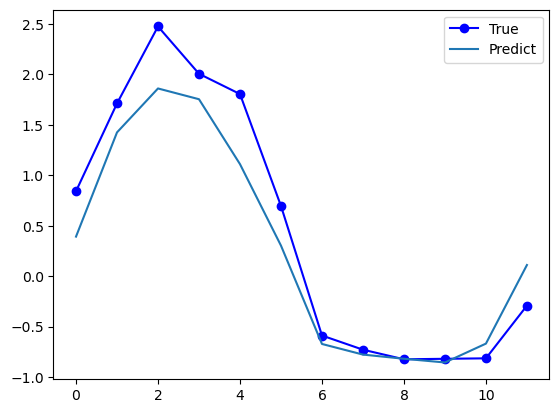

In [91]:
plt.plot(y_test, "-ob", label = "True")
plt.plot(y_pred, label = "Predict")
plt.legend()